In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import os, sys, pickle, json, time, math, re

In [2]:
filepath= "/Users/yan/processed_data/processedFrames.pkl"
OutputFrames = pickle.load(open(filepath, 'rb'))

In [3]:
admission_count = 0
rows = 0
rows_total = 0
df= pd.DataFrame()
for key, chartFrame in OutputFrames.items():
    countFrame = chartFrame.drop(['firstICU', 'subject', 'Height (cm)', 'Non Invasive Blood Pressure mean', 'Non Invasive Blood Pressure systolic', 'Non Invasive Blood Pressure diastolic', 'SBT', 'Propofol','Fentanyl (Concentrate)', 'Midazolam (Versed)','Fentanyl','Dexmedetomidine (Precedex)','Morphine Sulfate','Hydromorphone (Dilaudid)','Lorazepam (Ativan)'], axis=1)
    if countFrame.isnull().values.any() == False:
        df = df.append(countFrame, ignore_index=True)
        rows = len(countFrame.index)
        admission_count = admission_count +1
        rows_total = rows_total + rows

In [4]:
for i in df.index:
    if df.loc[i, 'Peak Insp. Pressure'] > 60:
        print(i, df.loc[i, 'Peak Insp. Pressure'])

43390 61.0
43391 61.0
43392 61.0
76402 62.0
76403 62.0
76404 62.0
76405 62.0
79011 62.0


In [5]:
outlier_O2 = []
for i in df.index:
    if df.loc[i, 'O2 saturation pulseoxymetry'] < 20:
        outlier_O2.append(i)
        print(i, df.loc[i, 'O2 saturation pulseoxymetry'])
        

26876 0.0
30456 0.0
30457 0.0
30458 0.0
30459 0.0
70826 0.0
71057 9.0
77970 16.0
77971 19.0
77972 0.0
77974 0.0
77975 0.0
77976 0.0
77977 0.0
77978 0.0
77979 0.0
77980 0.0
143959 14.0
148909 0.0
183352 0.0


In [6]:
df = df.drop(outlier_O2)

In [7]:
#### check blood pressure outliers ####
Outlier_bp = []
for i in df.index:
    if df.loc[i, 'Arterial Blood Pressure mean'] > 400 or df.loc[i, 'Arterial Blood Pressure mean'] < 10:
        Outlier_bp.append(i)
    if df.loc[i, 'Arterial Blood Pressure diastolic'] > 400 or df.loc[i, 'Arterial Blood Pressure diastolic'] < 10:
        Outlier_bp.append(i)
    if df.loc[i, 'Arterial Blood Pressure systolic'] > 400 or df.loc[i, 'Arterial Blood Pressure systolic'] < 10:
        Outlier_bp.append(i)
print(len(Outlier_bp))

0


In [8]:
x = df.drop(['timestamp', 'hadm'], axis=1)

In [9]:
column = list(x.columns.values)

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [11]:
x = StandardScaler().fit_transform(x)


In [16]:
x = pd.DataFrame(x, columns=column)

In [17]:
x.head()

,Admittype,Admdays,Ethnicity,Gender,Age,Admission Weight (Kg),Heart Rate,Respiratory Rate,O2 saturation pulseoxymetry,Inspired O2 Fraction,...,Richmond-RAS Scale,Peak Insp. Pressure,O2 Flow,Plateau Pressure,Arterial O2 pressure,Arterial CO2 Pressure,Vented,Arterial Blood Pressure systolic,Arterial Blood Pressure diastolic,Arterial Blood Pressure mean
0,0.419235,-0.964184,-0.686934,-0.852865,-0.026911,0.431529,-0.803177,-0.385715,0.926059,-0.546487,...,-1.494572,2.591541,-1.245804,0.589647,-0.131549,1.302699,-1.808897,-1.764556,-0.310647,-0.712130
1,0.419235,-0.964184,-0.686934,-0.852865,-0.026911,0.431529,-1.512418,-0.468180,0.926059,-0.546487,...,-1.494572,2.591541,-1.245804,0.589647,-0.131549,1.302699,0.552823,-1.764556,-0.310647,-0.712130
2,0.419235,-0.964184,-0.686934,-0.852865,-0.026911,0.431529,-1.370570,-0.385715,0.926059,-0.546487,...,-1.494572,2.591541,-1.245804,0.589647,-0.131549,1.302699,0.552823,-1.764556,-0.310647,-0.712130
3,0.419235,-0.964184,-0.686934,-0.852865,-0.026911,0.431529,-1.086873,-0.385715,0.926059,-0.546487,...,-1.494572,2.591541,-1.245804,0.589647,-0.131549,1.302699,0.552823,-1.140512,0.055780,-0.301258
4,0.419235,-0.964184,-0.686934,-0.852865,-0.026911,0.431529,-1.313831,-0.385715,0.926059,-0.546487,...,0.171510,2.079959,-1.245804,0.589647,-0.131549,1.302699,0.552823,-2.596614,-0.371718,-0.849087


In [27]:
pcamodel = PCA(n_components=5)
pca = pcamodel.fit_transform(x)
pca.shape

(301944, 5)

In [28]:
x['pca-one'] = pca[:,0]
x['pca-two'] = pca[:,1] 
x['pca-three'] = pca[:,2]

In [29]:
print('Explained variation per principal component: {}'.format(pcamodel.explained_variance_ratio_))

Explained variation per principal component: [0.14868741 0.08161316 0.07476119 0.0628756  0.05633812]


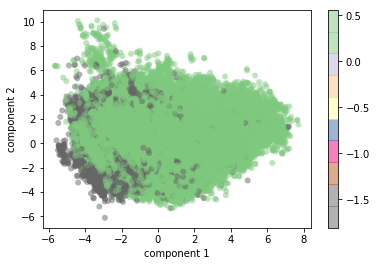

In [30]:
plt.scatter(x['pca-one'], x['pca-two'],
            c=x['Vented'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent_r', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [31]:
from sklearn.covariance import EmpiricalCovariance, MinCovDet
# fit a Minimum Covariance Determinant (MCD) robust estimator to data 
robust_cov = MinCovDet().fit(pca[:,:5])
# Get the Mahalanobis distance
m = robust_cov.mahalanobis(pca[:,:5])

In [32]:
ar = np.arange(len(m))

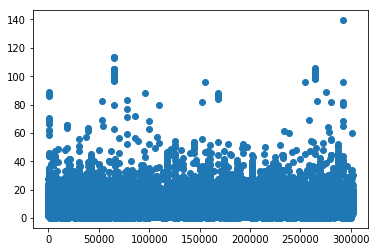

In [33]:
plt.scatter(ar, m)

In [34]:
std = np.std(m)
k = 3 * std
mean = np.mean(m)
up_t = mean + k
low_t = mean - k
up_t

21.61585201959379

In [35]:
outlier = []
for i in range(len(m)):
    if m[i] > 120:
        outlier.append(i)
        print(i)

292042


In [36]:
############check individual outliers #############
x.loc[292042,:]

Admittype                            -2.385299
Admdays                              -0.488802
Ethnicity                            -0.686934
Gender                               -0.852865
Age                                  -0.542087
Admission Weight (Kg)                 0.565266
Heart Rate                            0.501828
Respiratory Rate                     -0.220785
O2 saturation pulseoxymetry           0.156156
Inspired O2 Fraction                  3.781029
PEEP set                             -0.431170
Mean Airway Pressure                 -0.046827
Ventilator Mode                      -0.739700
Tidal Volume (observed)               2.827700
PH (Arterial)                        -1.868377
Respiratory Rate (spontaneous)        0.611749
Richmond-RAS Scale                    1.282232
Peak Insp. Pressure                  -0.477948
O2 Flow                               1.369746
Plateau Pressure                      0.589647
Arterial O2 pressure                 -0.191850
Arterial CO2 

In [37]:
#pcamodel.components_

In [38]:
rndperm = np.random.permutation(df.shape[0])

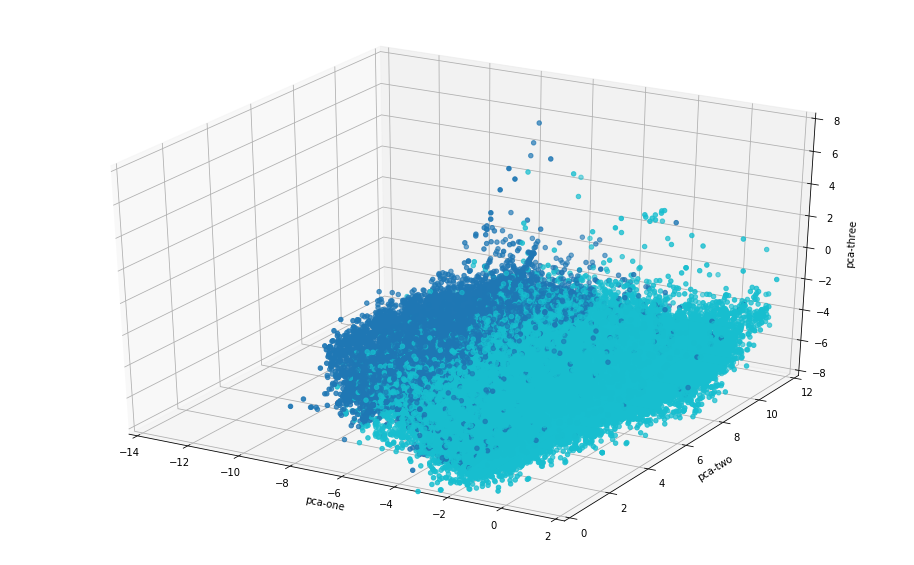

In [39]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=x.loc[rndperm,:]["pca-one"], 
    ys=x.loc[rndperm,:]["pca-two"], 
    zs=x.loc[rndperm,:]["pca-three"], 
    c=x.loc[rndperm,:]["Vented"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
ax.set_xlim(-14,2)
ax.set_ylim(0,12)
ax.set_zlim(-8, 8)

plt.show()

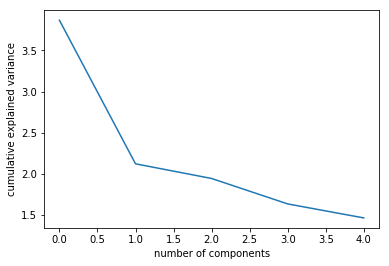

In [40]:
plt.plot(pcamodel.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

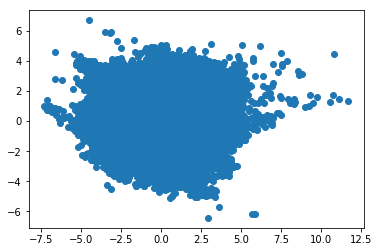

In [41]:
plt.scatter(pca[:, 2], pca[:, 3])

In [42]:
n = [n for n in range(len(m))]

In [41]:
len(n)

301944

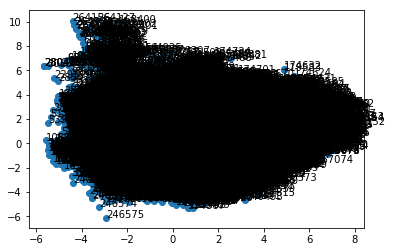

In [45]:
y_axis = pca[:,1]
x_axis = pca[:,0]

fig, ax = plt.subplots()
ax.scatter(x_axis, y_axis)

for i, txt in enumerate(n):
    ax.annotate(txt, (x_axis[i], y_axis[i]))

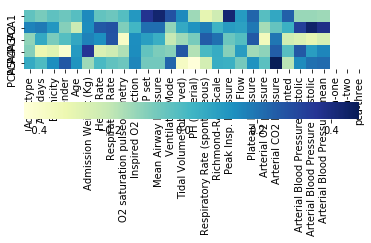

In [43]:
ax = sns.heatmap(pcamodel.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pcamodel.n_components_+1)],
                 xticklabels=list(x.columns),
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")

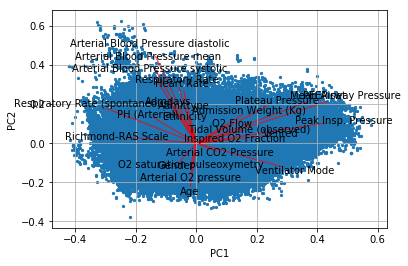

In [44]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'black', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'black', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

myplot(pca[:,0:2],np.transpose(pcamodel.components_[0:2, :]),list(x.columns))
plt.show()

In [ ]:
############ don't need to excute in the future ########

In [71]:
########## correcting blood pressure when the mean is higher than diastolic for individual patient based on Mahalanobis distance########
value = OutputFrames[120306]
a1=value.loc[51,'Non Invasive Blood Pressure systolic']
a2=value.loc[51,'Non Invasive Blood Pressure diastolic']
a3=value.loc[51,'Non Invasive Blood Pressure mean']

value.loc[51,'Arterial Blood Pressure systolic'] = a1
value.loc[51,'Arterial Blood Pressure diastolic'] = a2
value.loc[51,'Arterial Blood Pressure mean'] = a3
OutputFrames[120306] = value

In [ ]:
########## correcting blood pressure when the mean is higher than diastolic for individual patient based on Mahalanobis distance ########
value = OutputFrames[112089.0]
for i in range(4):
    sy = value.loc[i, 'Arterial Blood Pressure systolic']
    dia = value.loc[i, 'Arterial Blood Pressure diastolic']
    value.loc[i, 'Arterial Blood Pressure mean'] = (sy + 2*dia)/3
OutputFrames[112089.0] = value 

In [ ]:
########### correct bP when arterial blood pressure is less than 10 or bigger than 400(none, see the line below), 
#use non invasive blood pressure instead #####
outlier_id = []
for i in Outlier_bp:
    ids = df.loc[i, 'hadm']
    outlier_id.append(ids)
outlier_id = list(dict.fromkeys(outlier_id))

for key in outlier_id:
    value = OutputFrames[key]
    for i in value.index:
        if pd.isnull(value.loc[i, 'Non Invasive Blood Pressure systolic']) == False:           
            sy = value.loc[i, 'Non Invasive Blood Pressure systolic']
            value.loc[i, 'Arterial Blood Pressure systolic'] = sy
            OutputFrames[key] = value  

for key in outlier_id:
    value = OutputFrames[key]
    for i in value.index:
        if pd.isnull(value.loc[i, 'Non Invasive Blood Pressure diastolic']) == False:
            dia = value.loc[i, 'Non Invasive Blood Pressure diastolic']
            value.loc[i, 'Arterial Blood Pressure diastolic'] = dia
            OutputFrames[key] = value     
            
for key in outlier_id:
    value = OutputFrames[key]
    for i in value.index:
        if pd.isnull(value.loc[i, 'Non Invasive Blood Pressure mean']) == False:
            mea = value.loc[i, 'Non Invasive Blood Pressure mean']
            value.loc[i, 'Arterial Blood Pressure mean'] = mea
            OutputFrames[key] = value 

In [ ]:
###################### correct the blood pressure when it is over 500, and the same as the other two blood featurs########
####### don't need to excute in the future ######
outlier_id = []
for i in outlier:
    ids = df.loc[i, 'hadm']
    outlier_id.append(ids)
for key in outlier_id:
    value = OutputFrames[key]
    for i in value.index:
        if value.loc[i, 'Arterial Blood Pressure diastolic'] > 500:
            print(key)
            sy = value.loc[i, 'Arterial Blood Pressure systolic']
            mean = value.loc[i, 'Arterial Blood Pressure mean']
            dia = (3 * mean - sy)/2
            value.loc[i, 'Arterial Blood Pressure diastolic'] = dia
            OutputFrames[key] = value 

In [ ]:
outputname = "/Users/yan/processed_data/processedFrames.pkl"
pickle.dump(OutputFrames, open(outputname,'wb'))
################# outlier for blood pressure corrected ############

In [ ]:
#value = OutputFrames[103583]
#a1=value.loc[126,'Non Invasive Blood Pressure systolic']
#a2=value.loc[126,'Non Invasive Blood Pressure diastolic']
#a3=value.loc[126,'Non Invasive Blood Pressure mean']

#value.loc[126,'Arterial Blood Pressure systolic'] = a1
#value.loc[126,'Arterial Blood Pressure diastolic'] = a2
#value.loc[126,'Arterial Blood Pressure mean'] = a3

#b1=value.loc[127,'Non Invasive Blood Pressure systolic']
#b2=value.loc[127,'Non Invasive Blood Pressure diastolic']
#b3=value.loc[127,'Non Invasive Blood Pressure mean']

#value.loc[127,'Arterial Blood Pressure systolic'] = b1
#value.loc[127,'Arterial Blood Pressure diastolic'] = b2
#value.loc[127,'Arterial Blood Pressure mean'] = b3

#c1=value.loc[128,'Non Invasive Blood Pressure systolic']
#c2=value.loc[128,'Non Invasive Blood Pressure diastolic']
#c3=value.loc[128,'Non Invasive Blood Pressure mean']

#value.loc[128,'Arterial Blood Pressure systolic'] = c1
#value.loc[128,'Arterial Blood Pressure diastolic'] = c2
#value.loc[128,'Arterial Blood Pressure mean'] = c3
#OutputFrames[103583] = value

In [ ]:
# correct the outliers, in total 3 datapoints based on the PCA score plot
#value = OutputFrames[170057]
#value.loc[37, 'O2 saturation pulseoxymetry'] = 98.3
#OutputFrames[170057] = value
#value2 = OutputFrames[112776]
#value2.loc[value2['timestamp']== '2117-09-25 06:00:00', 'O2 saturation pulseoxymetry']
#value2.loc[220, 'O2 saturation pulseoxymetry'] =  99.5
#OutputFrames[112776] = value2
#value3 = OutputFrames[105280]
#value3.loc[value3['timestamp']== '2103-06-15 12:00:00', 'Arterial Blood Pressure mean']
#value3.loc[23, 'Arterial Blood Pressure mean'] = 90.3
#OutputFrames[105280] = value3
#outputname = "/Users/yan/processed_data/processedFrames.pkl"
#pickle.dump(OutputFrames, open(outputname,'wb'))

In [ ]:
#value = OutputFrames[176653]
#value.loc[value['Arterial Blood Pressure mean'] == 7469]
#value.loc[1, 'Arterial Blood Pressure mean'] = 74.69
#OutputFrames[176653] = value
#value1 = OutputFrames[188361]
#value1.loc[value1['Arterial Blood Pressure mean'] == 4851]
#value1.loc[37, 'Arterial Blood Pressure mean'] = 48.51
#OutputFrames[188361] = value1

In [ ]:
#value = OutputFrames[117430]
#value.loc[value['timestamp'] == '2129-06-05 10:00:00']
#value.loc[282, 'Arterial Blood Pressure diastolic'] = 113
#OutputFrames[117430] = value
#value1 = OutputFrames[105648]
#value1.loc[value1['timestamp'] == '2123-03-31 18:00:00']
#value1.loc[24, 'Arterial Blood Pressure diastolic'] = 77.5
#OutputFrames[105648] = value1
#value2 = OutputFrames[187772]
#value2.loc[value2['timestamp'] == '2148-10-26 18:00:00']
#value2.loc[19, 'Arterial Blood Pressure diastolic'] = 58.5
#OutputFrames[187772] = value2
#outputname = "/Users/yan/processed_data/processedFrames.pkl"
#pickle.dump(OutputFrames, open(outputname,'wb'))

In [ ]:
#value = OutputFrames[196123]
#value.loc[value['timestamp'] == '2105-11-09 04:00:00']
#value.loc[33, 'Arterial Blood Pressure diastolic'] = 55.5
#OutputFrames[196123] = value
#value1 = OutputFrames[159967]
#value1.loc[value1['timestamp'] == '2104-11-15 11:00:00']
#value1.loc[39, 'Respiratory Rate'] = 28                      possible to be 282 when PEEP = 13, FIO2 = 50
#OutputFrames[159967] = value1

In [ ]:
#value = OutputFrames[180951]
#value.loc[333, 'Respiratory Rate']
#value.loc[333, 'Respiratory Rate'] = 23
#OutputFrames[180951] = value
#value = OutputFrames[129244]
#value.loc[value['O2 saturation pulseoxymetry'] ==1]          
#value.loc[678, 'O2 saturation pulseoxymetry'] = 100
#OutputFrames[129244] = value

In [ ]:
#value = OutputFrames[142287]
#value.loc[51, 'Peak Insp. Pressure'] = 28
#value.loc[52, 'Peak Insp. Pressure'] = 28
#value.loc[53, 'Peak Insp. Pressure'] = 28
#value.loc[54, 'Peak Insp. Pressure'] = 28
#OutputFrames[142287] = value
#value = OutputFrames[169387]
#value.loc[190, 'Peak Insp. Pressure'] = 31
#value.loc[191, 'Peak Insp. Pressure'] = 31
#value.loc[192, 'Peak Insp. Pressure'] = 31
#value.loc[193, 'Peak Insp. Pressure'] = 31
#value.loc[194, 'Peak Insp. Pressure'] = 31
#OutputFrames[169387] = value  
#value = OutputFrames[115300]                         
#value.loc[197, 'Peak Insp. Pressure'] = 32
#value.loc[198, 'Peak Insp. Pressure'] = 32
#value.loc[199, 'Peak Insp. Pressure'] = 32
#value.loc[200, 'Peak Insp. Pressure'] = 32
#value.loc[201, 'Peak Insp. Pressure'] = 32
#OutputFrames[115300] = value
#value = OutputFrames[199533]
#value.loc[355, 'Peak Insp. Pressure'] = 22
#value.loc[356, 'Peak Insp. Pressure'] = 22
#value.loc[357, 'Peak Insp. Pressure'] = 22
#value.loc[358, 'Peak Insp. Pressure'] = 22
#OutputFrames[199533] = value
#value = OutputFrames[132172]
#value.loc[value['timestamp']== '2137-10-15 07:00:00']
#value.loc[156, 'O2 saturation pulseoxymetry'] = 100                 possible to be 0????
#OutputFrames[132172] = value